In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
import pandas as pd

In [3]:
## Modelo SIR

def SIR(f,t,parametros):
    #parameters
    b, G = parametros
    #variables
    s = f[0]
    i = f[1]

    Nc = f[2]
    #equations inclunding epidemic curve
    ds_dt = -b*s*i/N
    di_dt = b*s*i/N - G*i 
    dr_dt = G*i

    
    #new cases rate
    dNc_dt = b*s*i/N
    
    return [ds_dt,di_dt,dr_dt,dNc_dt] #aqui ele ta retornando cada valor do resultado pra S,I,R,N


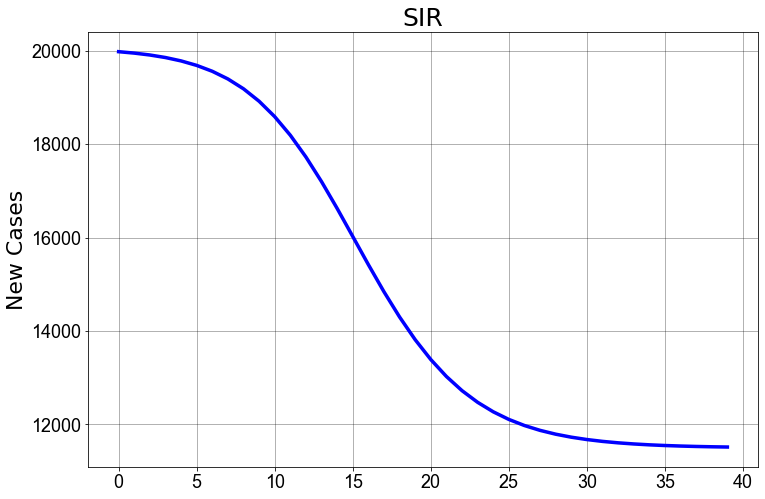

In [6]:
#Parameters
b=1.3
G=1.
N=20000
#initial conditions
i0=20
r0=0
n0=20
q0 = [N-i0-r0,i0,r0,n0] #cada entrada desse vetor é a condição inicial pra s,i,r,n, só vc mudar pra o seu caso
#parameters
parode = b,G
# Time list
ts0=np.arange(40)
#calls integrator
qs = odeint(SIR,q0, ts0,args=(parode,),mxstep=1000000)
qi = qs[:,0] #esse -1 retorna o resultado pra ultima entrada. Se colocar 0 dá a primeira, 1 dá a segunda e etc


#Figure
fig, ax = pl.subplots(figsize=(12,8))

#Creating Grid
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

#Plot
ax.plot(ts0,qi,'b-', linewidth=3.5)


#Set the labels
ax.set_ylabel('New Cases',fontsize=22)

#Set the title
ax.set_title('SIR',fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
pl.show()

#Save Fig
#fig.savefig(r"SIR.png",bbox_inches='tight')
